In [91]:
import pandas as pd

# Load the CSV files into DataFrames
matches_df = pd.read_csv('matches.csv')
passingevents_df = pd.read_csv('passingevents.csv')
fullevents_df = pd.read_csv('fullevents.csv')

# #load from drive
# matches_df = pd.read_csv('matches.csv')
# passingevents_df = pd.read_csv('passingevents.csv')
# fullevents_df = pd.read_csv('fullevents.csv')

# Display the first few rows of each DataFrame to confirm loading and view structure
matches_df.head(), passingevents_df.head(), fullevents_df.head()


(   MatchID OpponentID Outcome  OwnScore  OpponentScore  Side CoachID
 0        1  Opponent1     win         1              0  home  Coach1
 1        2  Opponent2     tie         1              1  away  Coach1
 2        3  Opponent3    loss         0              2  away  Coach1
 3        4  Opponent4    loss         0              3  home  Coach1
 4        5  Opponent5    loss         0              4  away  Coach1,
    MatchID     TeamID OriginPlayerID DestinationPlayerID MatchPeriod  \
 0        1    Huskies     Huskies_D1          Huskies_F1          1H   
 1        1    Huskies     Huskies_M1          Huskies_F2          1H   
 2        1  Opponent1   Opponent1_D2        Opponent1_G1          1H   
 3        1  Opponent1   Opponent1_G1        Opponent1_F1          1H   
 4        1    Huskies     Huskies_M2          Huskies_M3          1H   
 
    EventTime EventSubType  EventOrigin_x  EventOrigin_y  EventDestination_x  \
 0  46.323501    Head pass             34             97   

In [92]:
# from google.colab import drive
# drive.mount('/content/drive')

In [93]:
# Find the game with the highest score by the Huskies
high_scoring_match = matches_df.loc[matches_df['OwnScore'].idxmax()]

# Display details of the highest scoring match
high_scoring_match


MatchID                  14
OpponentID       Opponent14
Outcome                 win
OwnScore                  4
OpponentScore             0
Side                   home
CoachID              Coach2
Name: 13, dtype: object

In [94]:
# Filter events for the selected match where Huskies are involved
husky_events = fullevents_df[(fullevents_df['MatchID'] == 14) & (fullevents_df['TeamID'] == 'Huskies')]

# Calculate average coordinates for each Husky player
average_coordinates = husky_events.groupby('OriginPlayerID').agg(
    average_x=('EventOrigin_x', 'mean'),
    average_y=('EventOrigin_y', 'mean')
).dropna()  # Remove any NaN entries which might appear if no events were recorded for a player

average_coordinates.reset_index(inplace=True)  # Reset index to make player ID a column
average_coordinates


,OriginPlayerID,average_x,average_y
0,Huskies_D2,30.455882,38.838235
1,Huskies_D5,35.045455,15.738636
2,Huskies_D6,32.046875,68.984375
3,Huskies_D7,43.593023,85.406977
4,Huskies_F1,66.307692,53.551282
5,Huskies_F2,44.739583,34.489583
6,Huskies_G1,6.888889,30.444444
7,Huskies_M1,37.774648,53.267606
8,Huskies_M10,47.500000,14.666667
9,Huskies_M11,39.833333,49.666667


In [95]:
# Filter passing events for the selected match where Huskies are involved
husky_passes = passingevents_df[(passingevents_df['MatchID'] == 14) & (passingevents_df['TeamID'] == 'Huskies')]

# Create an adjacency matrix for passing between Husky players
adjacency_matrix = husky_passes.groupby(['OriginPlayerID', 'DestinationPlayerID']).size().unstack(fill_value=0)

# Fill in missing players in rows and columns to ensure the matrix is square
all_players = sorted(set(husky_passes['OriginPlayerID']).union(set(husky_passes['DestinationPlayerID'])))
adjacency_matrix = adjacency_matrix.reindex(index=all_players, columns=all_players, fill_value=0)

adjacency_matrix

DestinationPlayerID,Huskies_D2,Huskies_D5,Huskies_D6,Huskies_D7,Huskies_F1,Huskies_F2,Huskies_G1,Huskies_M1,Huskies_M10,Huskies_M11,Huskies_M4,Huskies_M6,Huskies_M8,Huskies_M9
OriginPlayerID,,,,,,,,,,,,,,
Huskies_D2,0,6,8,0,0,13,3,5,0,0,1,2,0,0
Huskies_D5,5,0,0,0,3,7,3,0,2,1,2,4,3,1
Huskies_D6,7,1,0,5,5,3,5,5,0,1,1,2,1,0
Huskies_D7,0,0,4,0,6,4,2,4,0,1,5,0,4,0
Huskies_F1,0,0,0,1,0,2,0,1,0,0,3,2,3,0
Huskies_F2,5,9,8,2,4,1,1,6,0,0,4,11,3,0
Huskies_G1,2,1,0,0,8,0,0,0,0,0,0,1,1,0
Huskies_M1,5,5,5,5,1,9,1,0,1,1,7,4,2,0
Huskies_M10,0,1,0,0,0,0,0,0,0,1,0,1,0,0


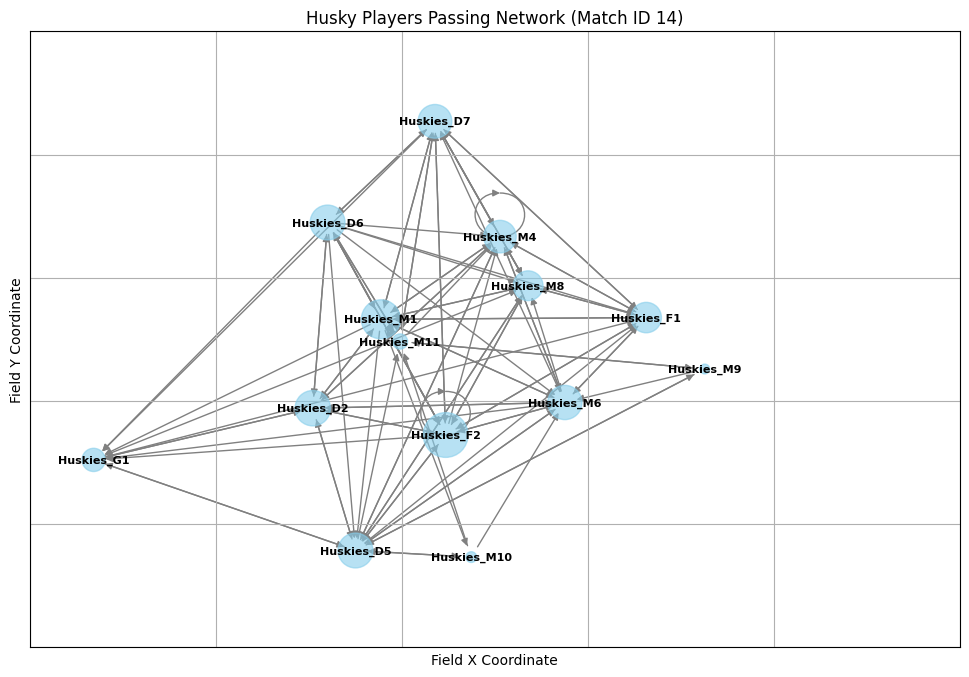

In [96]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the graph
G = nx.DiGraph()

# Add nodes with positions set to their average coordinates and size proportional to their involvement in passing
for index, row in average_coordinates.iterrows():
    player = row['OriginPlayerID']
    x, y = row['average_x'], row['average_y']
    # Calculate the degree (total passes made and received by the player)
    total_passes = adjacency_matrix.loc[player].sum() + adjacency_matrix[player].sum()
    G.add_node(player, pos=(x, y), size=total_passes)

# Add edges with weights equal to the number of passes between players
for origin in all_players:
    for destination in all_players:
        if adjacency_matrix.loc[origin, destination] > 0:  # Add edge only if there's at least one pass
            G.add_edge(origin, destination, weight=adjacency_matrix.loc[origin, destination])

# Extract positions and sizes for plotting
pos = nx.get_node_attributes(G, 'pos')
sizes = [G.nodes[node]['size'] * 10 for node in G]  # Scale by 10 for better visualization

# Draw the network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='-|>', arrowsize=10, width=1)

# Set limits and labels
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Field X Coordinate')
plt.ylabel('Field Y Coordinate')
plt.title('Husky Players Passing Network (Match ID 14)')
plt.grid(True)
plt.show()


In [97]:
# Total passes for Match ID 14
total_passes_match_14 = husky_passes.shape[0]

# Display total passes for Match ID 14
total_passes_match_14


347

In [98]:
# Calculate total passes and shots for each match
total_passes_per_match = passingevents_df[passingevents_df['TeamID'] == 'Huskies'].groupby('MatchID').size()
opp_passes_per_match = passingevents_df[passingevents_df['TeamID'] != 'Huskies'].groupby('MatchID').size()
total_shots_per_match = fullevents_df[(fullevents_df['TeamID'] == 'Huskies') & (fullevents_df['EventSubType'] == 'Shot')].groupby('MatchID').size()
opp_shots_per_match = fullevents_df[(fullevents_df['TeamID'] != 'Huskies') & (fullevents_df['EventSubType'] == 'Shot')].groupby('MatchID').size()



# Merge with match results to compare with scores
match_stats = matches_df.set_index('MatchID')[['OwnScore', 'OpponentScore']]
match_stats['TotalPasses'] = total_passes_per_match
match_stats['OppPasses'] = opp_passes_per_match
match_stats['TotalShots'] = total_shots_per_match
match_stats['OppShots'] = opp_shots_per_match
match_stats['pass_diff'] = (match_stats['TotalPasses'] - match_stats['OppPasses'])
match_stats['shot_diff'] = (match_stats['TotalShots'] - match_stats['OppShots'])
match_stats['goal_diff'] = (match_stats['OwnScore'] - match_stats['OpponentScore'])
# Display the combined DataFrame
match_stats.reset_index(inplace=True)
match_stats.head()


,MatchID,OwnScore,OpponentScore,TotalPasses,OppPasses,TotalShots,OppShots,pass_diff,shot_diff,goal_diff
0,1,1,0,369,197,8,10,172,-2,1
1,2,1,1,180,416,7,18,-236,-11,0
2,3,0,2,324,471,7,18,-147,-11,-2
3,4,0,3,354,345,9,15,9,-6,-3
4,5,0,4,382,373,6,12,9,-6,-4


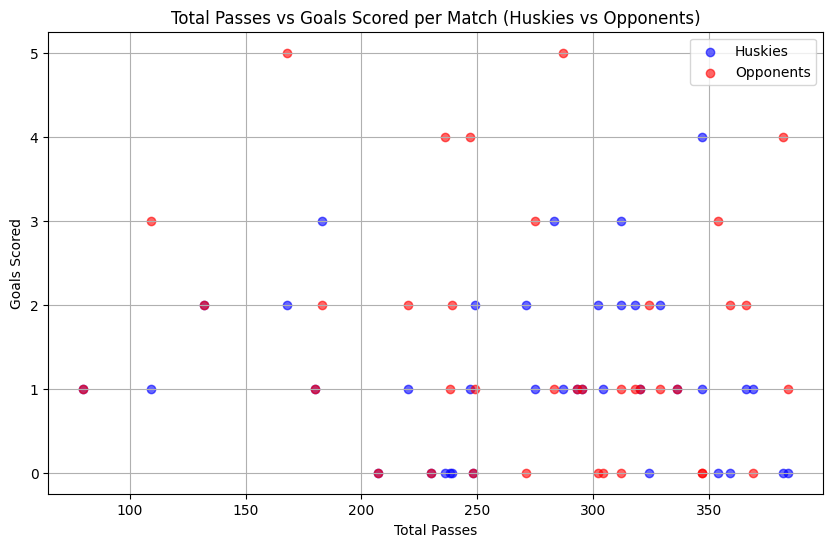

In [99]:
# Plotting total passes vs own scores and opponent scores without Match IDs
plt.figure(figsize=(10, 6))
plt.scatter(match_stats['TotalPasses'], match_stats['OwnScore'], color='blue', alpha=0.6, label='Huskies')
plt.scatter(match_stats['TotalPasses'], match_stats['OpponentScore'], color='red', alpha=0.6, label='Opponents')

# Adding labels and title
plt.xlabel('Total Passes')
plt.ylabel('Goals Scored')
plt.title('Total Passes vs Goals Scored per Match (Huskies vs Opponents)')
plt.grid(True)
plt.legend()

plt.show()


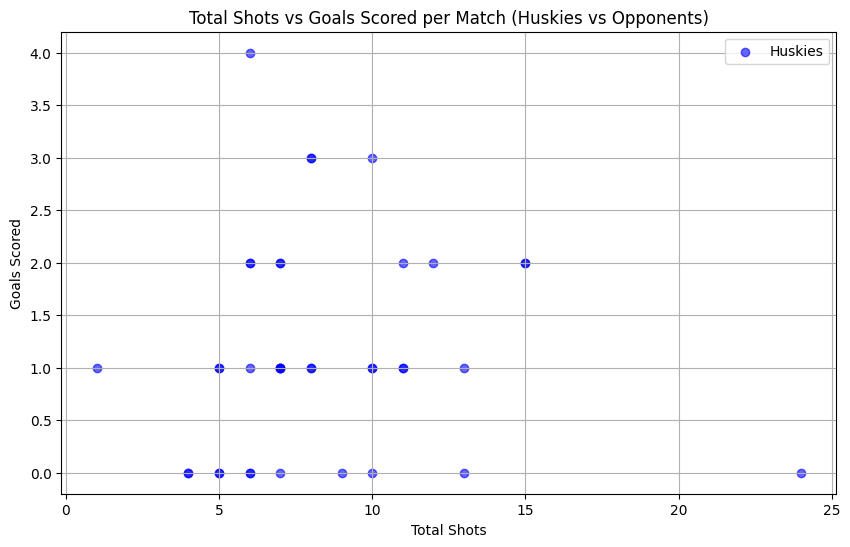

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(match_stats['TotalShots'], match_stats['OwnScore'], color='blue', alpha=0.6, label='Huskies')

# Adding labels and title
plt.xlabel('Total Shots')
plt.ylabel('Goals Scored')
plt.title('Total Shots vs Goals Scored per Match (Huskies vs Opponents)')
plt.grid(True)
plt.legend()

plt.show()

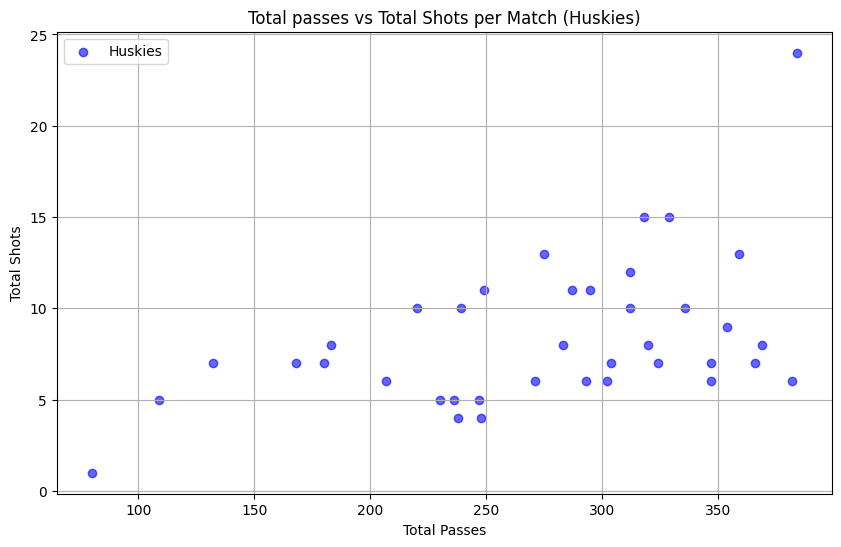

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(match_stats['TotalPasses'], match_stats['TotalShots'], color='blue', alpha=0.6, label='Huskies')



# Adding labels and title
plt.xlabel('Total Passes')
plt.ylabel('Total Shots')
plt.title('Total passes vs Total Shots per Match (Huskies)')
plt.grid(True)
plt.legend()

plt.show()

In [102]:
# Sort passing events by MatchID and EventTime
ordered_passes = passingevents_df[passingevents_df['TeamID'] == 'Huskies'].sort_values(by=['MatchID', 'EventTime'])

# Reset triadic patterns
triadic_passes = []

# Iterate through each match to find consecutive passes forming triads
for match_id in ordered_passes['MatchID'].unique():
    match_passes = ordered_passes[ordered_passes['MatchID'] == match_id].reset_index(drop=True)
    for i in range(len(match_passes) - 2):
        # Consider the player receiving the ball as the origin for the next pass
        triad = (match_passes.iloc[i]['OriginPlayerID'],
                 match_passes.iloc[i+1]['OriginPlayerID'],
                 match_passes.iloc[i+2]['OriginPlayerID'])
        triadic_passes.append(triad)

# Count frequency of each triad
triadic_counts = pd.Series(triadic_passes).value_counts().head(10)

triadic_counts


(Huskies_M1, Huskies_M3, Huskies_M1)    35
(Huskies_M3, Huskies_M1, Huskies_M3)    33
(Huskies_D3, Huskies_D1, Huskies_D4)    22
(Huskies_D1, Huskies_D2, Huskies_D3)    21
(Huskies_M1, Huskies_D4, Huskies_M1)    19
(Huskies_M1, Huskies_F2, Huskies_M1)    19
(Huskies_D4, Huskies_D1, Huskies_D3)    19
(Huskies_M1, Huskies_M6, Huskies_M1)    18
(Huskies_D4, Huskies_M3, Huskies_D4)    18
(Huskies_D1, Huskies_M1, Huskies_D1)    18
Name: count, dtype: int64

In [103]:
# Filter out sequences where the ball returns to the original player to ensure true triadic patterns
true_triadic_passes = [
    triad for triad in triadic_passes if len(set(triad)) == 3
]

# Count frequency of true triadic patterns
true_triadic_counts = pd.Series(true_triadic_passes).value_counts().head(10)

true_triadic_counts


(Huskies_D3, Huskies_D1, Huskies_D4)    22
(Huskies_D1, Huskies_D2, Huskies_D3)    21
(Huskies_D4, Huskies_D1, Huskies_D3)    19
(Huskies_D3, Huskies_G1, Huskies_D1)    17
(Huskies_D1, Huskies_G1, Huskies_D3)    17
(Huskies_M3, Huskies_M1, Huskies_F2)    17
(Huskies_M1, Huskies_F2, Huskies_D5)    17
(Huskies_D5, Huskies_F2, Huskies_M1)    16
(Huskies_M4, Huskies_F2, Huskies_M1)    15
(Huskies_D1, Huskies_D3, Huskies_G1)    15
Name: count, dtype: int64

In [104]:
import numpy as np

# Merge the full events and passing events to enrich passing data with all event types
full_data = pd.merge(fullevents_df, passingevents_df, on=["MatchID", "TeamID", "OriginPlayerID", "DestinationPlayerID", "MatchPeriod", "EventTime", "EventOrigin_x", "EventOrigin_y", "EventDestination_x", "EventDestination_y"], how="outer", suffixes=('', '_pass'))

# Fill NaN in EventSubType with the corresponding value from passingevents if available
full_data['EventSubType'] = full_data['EventSubType'].fillna(full_data['EventSubType_pass'])
full_data.drop(columns=['EventSubType_pass'], inplace=True)

# Sort by MatchID, MatchPeriod, and EventTime to ensure chronological order
full_data.sort_values(by=['MatchID', 'MatchPeriod', 'EventTime'], inplace=True)

# Identify changes in possession: changes in TeamID or significant events like goals, or end of match periods
full_data['possession_change'] = (full_data['TeamID'] != full_data['TeamID'].shift(1)) | (full_data['EventType'].isin(['Goal', 'Free Kick', 'Save attempt', 'Shot']))

# Assign a unique possession ID by cumulatively summing the possession changes
full_data['possession_id'] = full_data['possession_change'].cumsum()

# Filter the events to include only those ending with a shot
shots = full_data[full_data['EventType'] == 'Shot']
possession_ends_in_shot = shots['possession_id'].unique()

# Create the target variable: 1 if the possession ended in a shot, 0 otherwise
full_data['shot_on_target'] = np.where(full_data['possession_id'].isin(possession_ends_in_shot), 1, 0)

# Display summary to verify the process
full_data[['MatchID', 'TeamID', 'possession_id', 'shot_on_target']].head(), full_data['shot_on_target'].value_counts()


(   MatchID     TeamID  possession_id  shot_on_target
 0        1    Huskies              1               0
 1        1  Opponent1              2               0
 2        1    Huskies              3               0
 3        1  Opponent1              4               0
 4        1    Huskies              5               0,
 shot_on_target
 0    58405
 1      866
 Name: count, dtype: int64)

In [105]:
# Calculate possession features
# Number of events in each possession
full_data['event_count'] = full_data.groupby('possession_id')['EventTime'].transform('count')

# Duration of possession (difference between max and min time in each possession)
full_data['possession_duration'] = full_data.groupby('possession_id')['EventTime'].transform(lambda x: x.max() - x.min())

# Average position (X, Y) during the possession
full_data['avg_position_x'] = full_data.groupby('possession_id')['EventOrigin_x'].transform('mean')
full_data['avg_position_y'] = full_data.groupby('possession_id')['EventOrigin_y'].transform('mean')

# Total distance covered in the possession (sum of distances between consecutive events)
full_data['distance_covered'] = full_data.groupby('possession_id').apply(
    lambda group: np.sum(np.sqrt(np.diff(group['EventOrigin_x'])**2 + np.diff(group['EventOrigin_y'])**2))
).reset_index(level=0, drop=True).reindex(full_data.index, fill_value=0)

# Number of passes in the possession
full_data['pass_count'] = full_data.groupby('possession_id')['EventType'].transform(lambda x: (x == 'Pass').sum())

# Sample the first entry for each possession to get the possession level dataframe
possession_level_df = full_data.drop_duplicates('possession_id')

# Select the features and the target for analysis
features_and_target = possession_level_df[['event_count', 'possession_duration', 'avg_position_x', 'avg_position_y', 'distance_covered', 'pass_count', 'shot_on_target']]

# Display the prepared dataframe for analysis
features_and_target.head()


,event_count,possession_duration,avg_position_x,avg_position_y,distance_covered,pass_count,shot_on_target
0,1,0.000000,0.0,0.0,0.000000,0,0
1,1,0.000000,34.0,11.0,0.000000,0,0
2,1,0.000000,66.0,89.0,0.000000,0,0
3,1,0.000000,22.0,0.0,0.000000,0,0
4,2,0.681213,46.5,96.0,25.079872,1,0


In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
# Fill NaN values with zero for distance_covered and any other numerical feature
features_and_target.fillna(0, inplace=True)

# Re-standardize and re-apply PCA
scaler = StandardScaler()
pca = PCA(n_components = 0.85)
X_filled = scaler.fit_transform(features_and_target.drop('shot_on_target', axis=1))
X_pca_filled = pca.fit_transform(X_filled)
y = features_and_target['shot_on_target'].values


# Splitting the dataset into training and testing sets again
X_train_filled, X_test_filled, y_train, y_test = train_test_split(X_pca_filled, y, test_size=0.3, shuffle=True)

# Retrain logistic regression model
model = LogisticRegression()
model.fit(X_train_filled, y_train)

# New predictions and evaluation
y_pred_filled = model.predict(X_test_filled)
report_filled = classification_report(y_test, y_pred_filled)
conf_matrix_filled = confusion_matrix(y_test, y_pred_filled)

report_filled, conf_matrix_filled


('              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      7930\n           1       0.00      0.00      0.00       260\n\n    accuracy                           0.97      8190\n   macro avg       0.48      0.50      0.49      8190\nweighted avg       0.94      0.97      0.95      8190\n',
 array([[7930,    0],
        [ 260,    0]]))

In [109]:
# Since there might be confusion about the 'possession_id', let's directly use the full_data for merging
# Ensure 'possession_id' and 'shot_on_target' are available in full_data and then proceed
full_data['possession_id'] = full_data['possession_id'].astype(int)  # Making sure the column is of integer type for proper merging

# Filter the data to include only pass events
pass_data = full_data[full_data['EventType'] == 'Pass']

# Group by possession_id and EventSubType to count occurrences of each pass type in possessions
pass_types = pass_data.groupby(['possession_id', 'EventSubType']).size().unstack(fill_value=0)

# Add shot_on_target to this dataframe from the full_data
pass_types = pass_types.merge(full_data[['possession_id', 'shot_on_target']].drop_duplicates(), on='possession_id')

# Compute the average occurrence of each pass type in possessions that result in a shot and those that do not
pass_types_mean = pass_types.groupby('shot_on_target').mean()

pass_types_mean


,possession_id,Cross,Hand pass,Head pass,High pass,Launch,Simple pass,Smart pass
shot_on_target,,,,,,,,
0,13618.019354,0.105921,0.022873,0.202076,0.227237,0.103897,2.046362,0.044867
1,9564.666667,0.333333,0.000000,0.166667,0.333333,0.000000,2.333333,0.000000


In [110]:
# Extract data for Huskies from a specific match (e.g., MatchID 1)
huskies_data = fullevents_df[(fullevents_df['TeamID'] == 'Huskies') & (fullevents_df['MatchID'] == 1)]

# Extract player positions and coordinates
player_positions = huskies_data[['OriginPlayerID', 'EventOrigin_x', 'EventOrigin_y']]

# Calculate average positions for each player
average_positions = player_positions.groupby('OriginPlayerID').mean().reset_index()

# Display the average positions to infer formation
average_positions


,OriginPlayerID,EventOrigin_x,EventOrigin_y
0,Huskies_D1,31.821053,76.315789
1,Huskies_D2,33.750000,56.821429
2,Huskies_D3,33.233333,24.677778
3,Huskies_D4,48.481481,13.240741
4,Huskies_D5,56.074074,89.703704
5,Huskies_F1,62.753846,66.661538
6,Huskies_F2,57.648936,64.851064
7,Huskies_F3,68.000000,43.900000
8,Huskies_G1,6.348837,28.976744
9,Huskies_M1,50.846154,74.211538


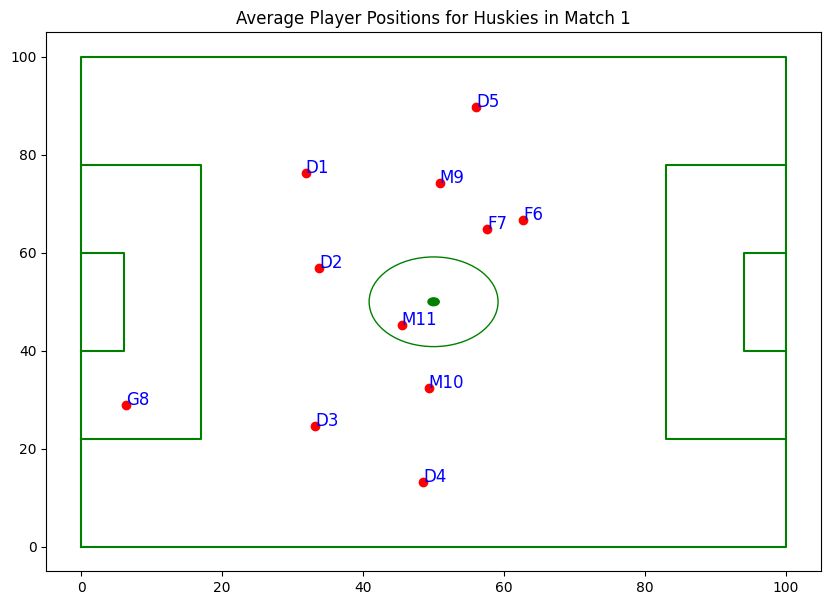

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data
fullevents_df = pd.read_csv('fullevents.csv')

# Extract data for Huskies from a specific match (e.g., MatchID 1)
huskies_data = fullevents_df[(fullevents_df['TeamID'] == 'Huskies') & (fullevents_df['MatchID'] == 1)]

# Ensure that coordinates are numeric and not missing
huskies_data['EventOrigin_x'] = pd.to_numeric(huskies_data['EventOrigin_x'], errors='coerce')
huskies_data['EventOrigin_y'] = pd.to_numeric(huskies_data['EventOrigin_y'], errors='coerce')
huskies_data.dropna(subset=['EventOrigin_x', 'EventOrigin_y'], inplace=True)

# Extract player positions
huskies_data['PlayerPosition'] = huskies_data['OriginPlayerID'].str.extract(r'_(\D)')[0]

# Identify the first 11 unique players based on their earliest appearance
initial_players = huskies_data.drop_duplicates(subset=['OriginPlayerID'], keep='first')
initial_players = initial_players.nsmallest(11, 'EventTime')

# Filter the full dataset to include only events involving these first 11 players
initial_player_ids = initial_players['OriginPlayerID'].unique()
filtered_data = huskies_data[huskies_data['OriginPlayerID'].isin(initial_player_ids)]

# Calculate the average positions for these players throughout the game
average_positions = filtered_data.groupby('OriginPlayerID').agg({
    'EventOrigin_x': 'mean',
    'EventOrigin_y': 'mean',
    'PlayerPosition': lambda x: x.mode()[0]
}).reset_index()

# Define a function to plot soccer field
def plot_field():
    """Plots a soccer field"""
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 7))
    # Pitch Outline & Centre Line
    plt.plot([0, 0, 100, 100, 0], [0, 100, 100, 0, 0], color="green")
    # Left Penalty Area
    plt.plot([0, 17, 17, 0], [22, 22, 78, 78], color="green")
    # Right Penalty Area
    plt.plot([100, 83, 83, 100], [22, 22, 78, 78], color="green")
    # Left 6-yard Box
    plt.plot([0, 6, 6, 0], [40, 40, 60, 60], color="green")
    # Right 6-yard Box
    plt.plot([100, 94, 94, 100], [40, 40, 60, 60], color="green")
    # Prepare Circles; Centre and Centre spot
    centreCircle = plt.Circle((50, 50), 9.15, color="green", fill=False)
    centreSpot = plt.Circle((50, 50), 0.8, color="green")
    # Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    return fig, ax

# Plot field
fig, ax = plot_field()

# Plot player positions
for i, row in average_positions.iterrows():
    ax.text(row['EventOrigin_x'], row['EventOrigin_y'], f"{row['PlayerPosition']}{i+1}", color="blue", fontsize=12)
    ax.plot(row['EventOrigin_x'], row['EventOrigin_y'], 'o', color="red")

plt.title('Average Player Positions for Huskies in Match 1')
plt.show()


In [112]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Load your data
fullevents_df = pd.read_csv('fullevents.csv')

# Filter to include only Huskies data and necessary columns
fullevents_df = fullevents_df[fullevents_df['TeamID'] == 'Huskies']
fullevents_df = fullevents_df[['MatchID', 'OriginPlayerID', 'EventOrigin_x', 'EventOrigin_y', 'EventTime']]

# Ensure that coordinates are numeric
fullevents_df['EventOrigin_x'] = pd.to_numeric(fullevents_df['EventOrigin_x'], errors='coerce')
fullevents_df['EventOrigin_y'] = pd.to_numeric(fullevents_df['EventOrigin_y'], errors='coerce')
fullevents_df.dropna(subset=['EventOrigin_x', 'EventOrigin_y'], inplace=True)

# Extract player positions
fullevents_df['PlayerPosition'] = fullevents_df['OriginPlayerID'].str.extract(r'_(\D)')[0]

# Process each game and infer formations
formations = {}
unique_matches = fullevents_df['MatchID'].unique()

for match_id in unique_matches:
    # Filter match data for this specific match
    match_data = fullevents_df[fullevents_df['MatchID'] == match_id]

    # Identify the first 11 unique players based on their earliest appearance
    initial_players = match_data.drop_duplicates(subset=['OriginPlayerID'], keep='first').nsmallest(11, 'EventTime')
    initial_player_ids = initial_players['OriginPlayerID'].unique()

    # Filter the full dataset to include only events involving these first 11 players
    filtered_data = match_data[match_data['OriginPlayerID'].isin(initial_player_ids)]

    # Function to predict formation based on the most common position per player in each match
    if filtered_data.empty:
        formations[match_id] = "No Data"
    else:
        # Count the most frequent position for each player
        player_positions = filtered_data.groupby('OriginPlayerID')['PlayerPosition'].agg(lambda x: x.mode()[0])
        position_counts = player_positions.value_counts()

        # Ensure we have all position categories even if some are missing
        for pos in ['G', 'D', 'M', 'F']:
            if pos not in position_counts:
                position_counts[pos] = 0

        # Create a formation string, skipping goalkeeper
        formation = '-'.join(map(str, [position_counts[pos] for pos in ['D', 'M', 'F']]))
        formations[match_id] = formation

# Print all formations for each match
print(formations)

{1: '5-3-2', 2: '5-3-2', 3: '5-4-1', 4: '3-5-2', 5: '5-4-1', 6: '4-4-2', 7: '4-4-2', 8: '4-4-2', 9: '4-4-2', 10: '3-5-2', 11: '4-4-2', 12: '3-5-2', 13: '4-5-1', 14: '4-4-2', 15: '4-4-2', 16: '4-5-1', 17: '4-4-2', 18: '4-4-2', 19: '4-4-2', 20: '5-4-1', 21: '4-4-2', 22: '4-4-2', 23: '4-4-2', 24: '4-4-2', 25: '4-3-3', 26: '4-4-2', 27: '5-3-3', 28: '4-3-3', 29: '4-3-3', 30: '4-3-3', 31: '4-3-3', 32: '4-2-4', 33: '4-3-3', 34: '4-3-3', 35: '4-3-3', 36: '4-3-3', 37: '5-5-0', 38: '4-4-2'}


In [114]:
import warnings
warnings.filterwarnings('ignore')

# Load your data
fullevents_df = pd.read_csv('fullevents.csv')

# Filter to include only opponent data and necessary columns
opponent_data = fullevents_df[fullevents_df['TeamID'] != 'Huskies']
opponent_data = opponent_data[['MatchID', 'OriginPlayerID', 'EventOrigin_x', 'EventOrigin_y', 'EventTime', 'TeamID']]

# Ensure that coordinates are numeric
opponent_data['EventOrigin_x'] = pd.to_numeric(opponent_data['EventOrigin_x'], errors='coerce')
opponent_data['EventOrigin_y'] = pd.to_numeric(opponent_data['EventOrigin_y'], errors='coerce')
opponent_data.dropna(subset=['EventOrigin_x', 'EventOrigin_y'], inplace=True)

# Extract player positions
opponent_data['PlayerPosition'] = opponent_data['OriginPlayerID'].str.extract(r'_(\D)')[0]

# Process each game and infer opponents' formations
opponent_formations = {}
unique_matches = opponent_data['MatchID'].unique()

for match_id in unique_matches:
    # Filter match data for this specific match
    match_data = opponent_data[opponent_data['MatchID'] == match_id]

    # Assuming there's only one opponent per match, find which team it is
    opponent_team_id = match_data['TeamID'].iloc[0] if not match_data['TeamID'].empty else None

    if opponent_team_id:
        # Filter match data for the specific opponent team
        specific_opponent_data = match_data[match_data['TeamID'] == opponent_team_id]

        # Identify the first 11 unique players based on their earliest appearance
        initial_players = specific_opponent_data.drop_duplicates(subset=['OriginPlayerID'], keep='first').nsmallest(11, 'EventTime')
        initial_player_ids = initial_players['OriginPlayerID'].unique()

        # Filter the full dataset to include only events involving these first 11 players
        filtered_data = specific_opponent_data[specific_opponent_data['OriginPlayerID'].isin(initial_player_ids)]

        # Function to predict formation based on the most common position per player in each match
        if filtered_data.empty:
            opponent_formations[match_id] = "No Data"
        else:
            # Count the most frequent position for each player
            player_positions = filtered_data.groupby('OriginPlayerID')['PlayerPosition'].agg(lambda x: x.mode()[0])
            position_counts = player_positions.value_counts()

            # Ensure we have all position categories even if some are missing
            for pos in ['G', 'D', 'M', 'F']:
                if pos not in position_counts:
                    position_counts[pos] = 0

            # Create a formation string, skipping goalkeeper
            formation = '-'.join(map(str, [position_counts[pos] for pos in ['D', 'M', 'F']]))
            opponent_formations[match_id] = formation

# Print all formations for each opponent match
print(opponent_formations)


{1: '4-3-3', 2: '3-4-3', 3: '4-4-2', 4: '5-4-1', 5: '4-4-2', 6: '4-4-2', 7: '4-5-1', 8: '4-5-1', 9: '5-3-2', 10: '5-4-1', 11: '4-4-2', 12: '4-6-0', 13: '4-5-1', 14: '5-3-2', 15: '4-4-2', 16: '4-3-3', 17: '4-5-1', 18: '4-5-2', 19: '4-4-2', 20: '4-4-2', 21: '4-4-2', 22: '4-5-1', 23: '4-4-2', 24: '4-4-2', 25: '3-5-2', 26: '5-4-1', 27: '4-4-2', 28: '4-3-3', 29: '4-5-2', 30: '4-4-2', 31: '4-5-1', 32: '4-4-2', 33: '4-3-3', 34: '4-4-2', 35: '4-4-2', 36: '4-4-2', 37: '5-5-1', 38: '5-4-1'}


In [115]:
formations_df = pd.DataFrame(list(formations.items()), columns=['MatchID', 'Husky_Formation'])
opponent_formations_df = pd.DataFrame(list(opponent_formations.items()), columns=['MatchID', 'Opponent_Formation'])

# Ensure that MatchID is the correct datatype in both DataFrames
match_stats['MatchID'] = match_stats['MatchID'].astype(int)
formations_df['MatchID'] = formations_df['MatchID'].astype(int)
opponent_formations_df['MatchID'] = opponent_formations_df['MatchID'].astype(int)

# Merge the DataFrames
match_stats = pd.merge(match_stats, formations_df, on='MatchID', how='left')
match_stats = pd.merge(match_stats, opponent_formations_df, on='MatchID', how='left')



In [116]:
match_stats

,MatchID,OwnScore,OpponentScore,TotalPasses,OppPasses,TotalShots,OppShots,pass_diff,shot_diff,goal_diff,Opponent_Formation,Husky_Formation
0,1,1,0,369,197,8,10,172,-2,1,4-3-3,5-3-2
1,2,1,1,180,416,7,18,-236,-11,0,3-4-3,5-3-2
2,3,0,2,324,471,7,18,-147,-11,-2,4-4-2,5-4-1
3,4,0,3,354,345,9,15,9,-6,-3,5-4-1,3-5-2
4,5,0,4,382,373,6,12,9,-6,-4,4-4-2,5-4-1
5,6,2,1,318,294,15,8,24,7,1,4-4-2,4-4-2
6,7,0,1,384,179,24,4,205,20,-1,4-5-1,4-4-2
7,8,1,1,295,277,11,11,18,0,0,4-5-1,4-4-2
8,9,2,5,168,501,7,26,-333,-19,-3,5-3-2,4-4-2
9,10,0,2,359,214,13,7,145,6,-2,5-4-1,3-5-2


In [119]:
match_stats.loc[(match_stats['OwnScore'] > match_stats['OpponentScore'])].groupby(by = ['Formation']).count()

KeyError: 'Formation'

In [118]:
match_stats.loc[(match_stats['OwnScore'] < match_stats['OpponentScore'])].groupby(by = ['Formation']).count()

KeyError: 'Formation'